# With a switch

Next we look at the double stochastic process,

$$D \rightarrow D^*$$
$$D^* \rightarrow D^*+M$$
$$M \rightarrow \phi$$

In [3]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
k_b=10
k_d=1
T_max = 25/k_d

In [5]:
c_b=.2
c_f=.5

In [6]:
dt = .01;
nreps = 1000
tau = 1/k_d
P = np.zeros(int(T_max/dt)*nreps)
j=0

for rep in range(nreps):
    i=0
    x=0
    q0 = int(np.random.rand()>c_b/(c_b+c_f))
    q1 = 1-q0
    t=0
    while t<T_max:
        r1,r2=np.random.rand(1,2).flatten().tolist()
        p1 = c_f*q0
        p2 = c_b*q1
        p3 = k_b*q1
        p4 = k_d*x
        p_net = p1+p2+p3+p4
        t_react = -np.log(r1)/p_net
        t=t+t_react
    
        while i<np.min([int(t/dt),int(T_max/dt)]):
            if t>5*tau and i%int(tau)==0:
                P[j]=x
                j=j+1
            i=i+1

        if r2<p1/p_net:
            q1=1
            q0=0
        
        elif r2<(p1+p2)/p_net:
            q1=0
            q0=1
    
        elif r2<(p1+p2+p3)/p_net:
            x=x+1
        
        else:
            x=x-1

Text(0.5, 1.0, 'Probability distribution for $c_b=c_f<k_d$')

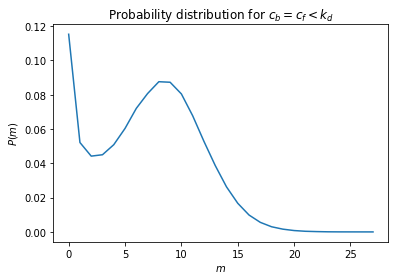

In [9]:
P=P.astype(int)
plt.plot(np.bincount(P[:j])/np.sum(np.bincount(P[:j])))
bin_counts = np.bincount(P[:j])/np.sum(np.bincount(P[:j]))
plt.ylabel(r"$P(m)$")
plt.xlabel(r"$m$")
plt.title("Probability distribution for $c_b=c_f<k_d$")